In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle as pkl
#from google.colab import drive
from os import listdir
from random import Random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler

#folder_path = '/content/drive/MyDrive/ML_Project'
#datasets_path = '/content/drive/MyDrive/ML_Project/datasets'

#drive.mount("/content/drive")

df_train = pd.read_csv(f'datasets/trainV2_cleaned.csv')
df_train = df_train.drop(['outcome_damage_amount','outcome_damage_inc'], 1)

#df_to_predict = pd.read_csv(f'{datasets_path}/score.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   income_am                      5000 non-null   float64
 1   profit_last_am                 5000 non-null   float64
 2   profit_am                      5000 non-null   float64
 3   damage_am                      5000 non-null   float64
 4   damage_inc                     5000 non-null   int64  
 5   crd_lim_rec                    5000 non-null   float64
 6   cab_requests                   5000 non-null   int64  
 7   bar_no                         5000 non-null   int64  
 8   neighbor_income                5000 non-null   float64
 9   age                            5000 non-null   int64  
 10  client_segment                 5000 non-null   float64
 11  sect_empl                      5000 non-null   int64  
 12  fam_adult_size                 5000 non-null   i

C:\Users\robbe\AppData\Local\Temp/ipykernel_12652/3265480302.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train = df_train.drop(['outcome_damage_amount','outcome_damage_inc'], 1)


In [2]:
df_shuffle = df_train.sample(frac=1, random_state=123)
#outcomes = ['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount']

x = df_shuffle.drop('outcome_profit',1)
y = df_shuffle["outcome_profit"]

x_trainval, x_test, y_trainval, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)
x_train, x_val, y_train, y_val = train_test_split(x_trainval,y_trainval, test_size=0.2, random_state=1234)

"""
num_feat = x_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
x_train_stand = x_train.copy()
x_trainval_stand = x_trainval.copy()
x_val_stand = x_val.copy()

x_test_stand = x_test.copy()
x_train_stand[num_feat] = scaler.fit_transform(x_train_stand[num_feat])
x_val_stand[num_feat] = scaler.transform(x_val_stand[num_feat])
x_trainval_stand[num_feat] = scaler.transform(x_trainval_stand[num_feat])
x_test_stand[num_feat] = scaler.transform(x_test_stand[num_feat])
"""
df_shuffle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2648 to 3582
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   income_am                      5000 non-null   float64
 1   profit_last_am                 5000 non-null   float64
 2   profit_am                      5000 non-null   float64
 3   damage_am                      5000 non-null   float64
 4   damage_inc                     5000 non-null   int64  
 5   crd_lim_rec                    5000 non-null   float64
 6   cab_requests                   5000 non-null   int64  
 7   bar_no                         5000 non-null   int64  
 8   neighbor_income                5000 non-null   float64
 9   age                            5000 non-null   int64  
 10  client_segment                 5000 non-null   float64
 11  sect_empl                      5000 non-null   int64  
 12  fam_adult_size                 5000 non-null 

C:\Users\robbe\AppData\Local\Temp/ipykernel_12652/797305157.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df_shuffle.drop('outcome_profit',1)


In [3]:
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [4]:
predictions_train = reg.predict(x_train)
predictions_val = reg.predict(x_val)

In [5]:
print(r2_score(y_train, predictions_train))
print(r2_score(y_val, predictions_val))

0.38481752743237696
0.27409919683561734


In [6]:
print(mean_absolute_error(y_val, predictions_val))
print(mean_absolute_error(y_train, predictions_train))

0.5293352445015023
0.5238351383120322


In [7]:
print(mean_squared_error(y_val, predictions_val))
print(mean_squared_error(y_train, predictions_train))

0.585156799441102
0.47282657767250247


In [8]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
x_train_poly.shape

(3200, 2278)

In [9]:
# Define the model
reg_quad = LinearRegression(fit_intercept=False)

#Fit the model
reg_quad.fit(x_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [10]:
print(reg_quad.score(x_train_poly, y_train))
print(reg_quad.score(x_val_poly, y_val))

0.6421707799961573
0.1958058194170036


In [11]:
#avg_scores = [None] * 5

#for i in np.arange(1,6):
    
#    reg_poly = Pipeline([('poly', PolynomialFeatures(degree=i)),
#                        ('linear', LinearRegression(fit_intercept=False))])
    
#    scores = cross_val_score(reg_poly, x_train_stand, y_train,  scoring="r2", cv=5)
    
#    avg_scores[i-1] = scores.mean()
    
#    print("Order "+str(i)+": avg R^2 = "+str( avg_scores[i-1]))

In [12]:
#fig, ax = plt.subplots(figsize=(8, 6))
#plt.scatter(np.arange(1,6), avg_scores, c='b', label='data')
#plt.axis('tight')
#plt.title("Cross-validation polynomials")
#ax.set_xlabel("Order")
#ax.set_ylabel("CV R^2")
#plt.tight_layout()
#plt.show()

#RNN

In [13]:
Radius = np.linspace(1, 16, 15)
cv_scores = []
sd_scores = []

for j in Radius:
  rnn = RadiusNeighborsRegressor(radius=j)
  scores = cross_val_score(rnn, x_train, y_train, cv=5)
  cv_scores.append(scores.mean())
  sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "C:\Users\robbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in 

#KNN

In [14]:
k = np.arange(1, 500)
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for n in k:
    knn = KNeighborsRegressor(n_neighbors= n)
    scores = cross_val_score(knn, x_train, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

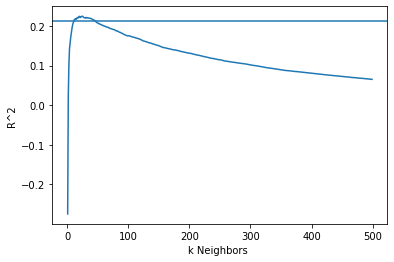

The best k is 25


In [15]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(k, cv_scores)
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()
print('The best k is', k[max_index])

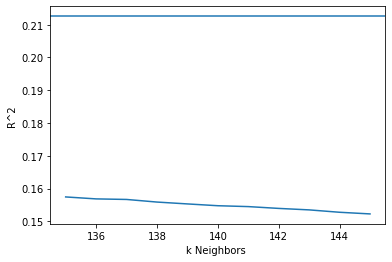

The best k is 25


In [16]:
plt.plot(k[134 : 145],cv_scores[134 : 145])
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')

plt.axhline(y=max_value-1.96*sd_scores[max_index])


plt.show()
print('The best k is', k[max_index])

In [17]:
knn = KNeighborsRegressor(n_neighbors=140)
knn.fit(x_train, y_train)  
print('train value:',knn.score(x_train, y_train) )
print('validation value:',knn.score(x_val, y_val) )

train value: 0.18758417731499
validation value: 0.14797458146494047


In [18]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(x_train)
X_val_poly = poly.transform(x_val)
X_train_poly.shape

(3200, 52394)

In [19]:
linreg_lassoCV = LassoCV(cv=5, max_iter=500, n_jobs=-1, verbose=1).fit(X_train_poly, y_train)
print('R2 Training : %.3f' % linreg_lassoCV.score(X_train_poly, y_train))
print('R2 Testing : %.3f' % linreg_lassoCV.score(X_val_poly, y_val))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
............

In [ ]:
criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 250, num = 150)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 490)]

random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, 
                               cv = 5, verbose=5, random_state=6541, n_jobs=-1)

rf_random.fit(x_train, y_train)

NameError: ignored

In [ ]:
print(rf_random.score(x_train, y_train))
print(rf_random.score(x_val, y_val))

In [ ]:
out = pd.DataFrame(rf_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out['param_max_features'], out['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')

NameError: ignored

In [ ]:
out = out[out.mean_test_score > 0.19]

In [ ]:
xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators', 'param_max_leaf_nodes']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(8,6))
    xs = out[xlabel]
    ys = out['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");
    ax.set_title(xlabel)

    for x, y in zip(xs, ys):
        label = f"({x}, {round(y, 3)})"
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

In [ ]:
rf_random.best_params_

In [ ]:
max_depth = [9, 12, 13, 14]
min_samples_split = [7, 8, 9, 13]
min_samples_leaf = [3, 4, 5]
n_estimators = [357, 392, 400, 465]
max_features = ['auto']
max_leaf_nodes = [272, 366, 383]
criterion =['mse']


# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
                'max_leaf_nodes': max_leaf_nodes,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# then do cross-validatoin
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = grid,
                               cv = 5, verbose=1,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
rf_grid.fit(x_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
params = rf_grid.best_params_
rf_gridBest = RandomForestRegressor(**params)
rf_gridBest.fit(x_train, y_train)
print('R2: %.3f' % rf_gridBest.score(x_train, y_train))
print('R2: %.3f' % rf_gridBest.score(x_val, y_val))

In [ ]:
plt.figure(figsize=(20,10))

feat_importances = pd.Series(rf_gridBest.feature_importances_, index=x_train.columns)
feat_importances.nlargest(38).plot(kind='barh')
plt.show()

In [ ]:
plt.figure()

feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
max_features = ['auto']
criterion =['mse']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 300)]
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 50)]
loss = ['ls','lad','huber','quantile']
learning_rate = [round(x,5) for x in np.linspace(0.1, 1, num = 10)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'loss': loss,
               'learning_rate': learning_rate}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 1000, 
                               cv = 5, verbose=2, random_state=1234, n_jobs=-1)
gbm_random.fit(x_train, y_train)

In [ ]:
print(gbm_random.score(x_train, y_train))
gbm_random.score(x_val, y_val)

In [ ]:
out2 = pd.DataFrame(gbm_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators', 'param_max_leaf_nodes']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(8,6))
    xs = out2[xlabel]
    ys = out2['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");

In [ ]:
out2 = out2[out2.mean_test_score > 0.18]

In [ ]:
xlabel_names = ['param_n_estimators', 'param_min_samples_split','param_min_samples_leaf','param_max_leaf_nodes','param_max_depth', 'param_learning_rate']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(10, 8))
    xs = out2[xlabel]
    ys = out2['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");
    ax.set_title(xlabel)

    for x, y in zip(xs, ys):
        label = f"({x}, {round(y, 3)})"
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

In [ ]:
gbm_random.best_params_

In [ ]:
n_estimators = [100, 106, 225, 320]
min_samples_split = [10, 13, 14]
min_samples_leaf = [8, 10, 14]
max_leaf_nodes = [10, 170, 180, 370]
max_features = ['auto']
max_depth = [1, 2]
loss = ['ls']

learning_rate = [0.1, 0.2, 0.39, 0.4]
criterion =['squared_error']


# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'learning_rate': learning_rate,
               'loss':loss}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = grid,
                               cv = 10, verbose=2,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
gbm_grid.fit(x_train, y_train)

In [ ]:
gbm_grid.best_params_

In [ ]:
params = gbm_grid.best_params_
gbm_gridBest = GradientBoostingRegressor(**params)
gbm_gridBest.fit(x_train, y_train)
print('R2: %.3f' % gbm_gridBest.score(x_train, y_train))
print('R2: %.3f' % gbm_gridBest.score(x_val, y_val))

In [ ]:
#model = beste model nog veranderen!!
#joblib.dump(gbm_gridBest, "pickles/profit_amount_best_model.pkl")